## Importing packages and the Dataset to do some EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/kc_house_data.csv')

### Viewing the Data

In [2]:
df.head().iloc[:, 10:]

,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.head().iloc[:, :11]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Initial Takeaways:
- I would like to add a datetime column for the dates, including year and month seperately.
- Waterfront and year renovated seem to be the only columns with NaN values.
- It seems that there is a lot of categorical columns: bedrooms, bathrooms, floors, waterfront, view, grade, condition. Dates and location info like yr_built, yr_renovated, lat, long, and zipcode are also non-continous values. 
- Some zero values might indicate something is non-existent, e.g. when sqft_basement or yr_renovated entry = 0.

### A look at 'Price': Descriptive Statistics 

In [6]:
price = df['price']

In [7]:
desc_stat_price = dict(price.describe())

In [8]:
desc_stat_price

{'count': 21597.0,
 'mean': 540296.5735055795,
 'std': 367368.1401013945,
 'min': 78000.0,
 '25%': 322000.0,
 '50%': 450000.0,
 '75%': 645000.0,
 'max': 7700000.0}

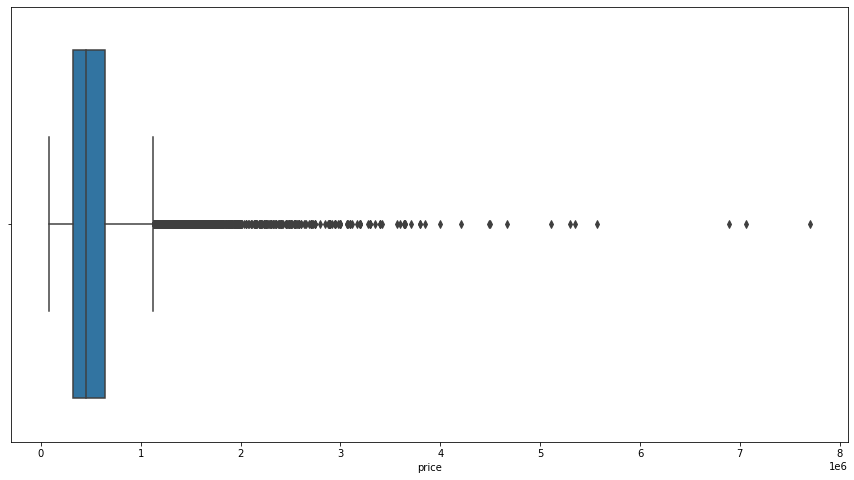

In [9]:
plt.figure(figsize = (15,8))
sns.boxplot(price);

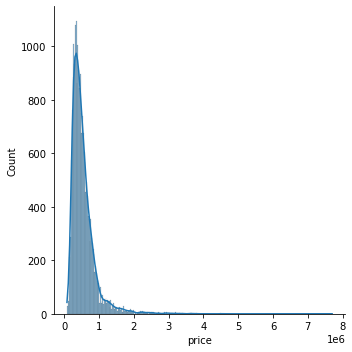

In [10]:
sns.displot(price, kde=True);

#### Takeaways from Price:
- Seems usual that the price would be skewed to the right, many outliers of vey expensive homes.
- Not normally disributed because of that fact. Might need to manipulate before running regression.
- We can assume that this 'price' column will be our dependent vairable in regression models.

## Clean some things up...

### Change date to datetime 

In [11]:
df['date'] = pd.to_datetime(df['date'])

### Find NaN and 0 values

In [12]:
# of NaN in columns
def num_NaN(dataframe):
    column_lst = dataframe.columns.values.tolist()
    for column in column_lst:
        num_of_nan = len(df[df[column].isna() == True])
        print(f'# of NaN in the {column} column: {num_of_nan}')
    return

In [13]:
# of zeros in columns
def num_zeros(dataframe):
    column_lst = dataframe.columns.values.tolist()
    for column in column_lst:
        num_of_zeros = len(df[(df[column] == 0) | (df[column] == '0') | (df[column] == '0.0')])
        print(f'# of zeros in the {column} column: {num_of_zeros}')
    return

In [14]:
num_NaN(df)

# of NaN in the id column: 0
# of NaN in the date column: 0
# of NaN in the price column: 0
# of NaN in the bedrooms column: 0
# of NaN in the bathrooms column: 0
# of NaN in the sqft_living column: 0
# of NaN in the sqft_lot column: 0
# of NaN in the floors column: 0
# of NaN in the waterfront column: 2376
# of NaN in the view column: 63
# of NaN in the condition column: 0
# of NaN in the grade column: 0
# of NaN in the sqft_above column: 0
# of NaN in the sqft_basement column: 0
# of NaN in the yr_built column: 0
# of NaN in the yr_renovated column: 3842
# of NaN in the zipcode column: 0
# of NaN in the lat column: 0
# of NaN in the long column: 0
# of NaN in the sqft_living15 column: 0
# of NaN in the sqft_lot15 column: 0


In [15]:
num_zeros(df)

# of zeros in the id column: 0
# of zeros in the date column: 0
# of zeros in the price column: 0
# of zeros in the bedrooms column: 0
# of zeros in the bathrooms column: 0
# of zeros in the sqft_living column: 0
# of zeros in the sqft_lot column: 0
# of zeros in the floors column: 0
# of zeros in the waterfront column: 0
# of zeros in the view column: 0
# of zeros in the condition column: 0
# of zeros in the grade column: 0
# of zeros in the sqft_above column: 0
# of zeros in the sqft_basement column: 12826
# of zeros in the yr_built column: 0
# of zeros in the yr_renovated column: 17011
# of zeros in the zipcode column: 0
# of zeros in the lat column: 0
# of zeros in the long column: 0
# of zeros in the sqft_living15 column: 0
# of zeros in the sqft_lot15 column: 0


##### 'yr_renovated'

In [16]:
#Turning 0.0 floats into NaN
df['yr_renovated'] = df['yr_renovated'].replace({0.0:np.nan})

##### 'sqft_basement'

In [17]:
# replace zeros and symbols with NaN
df['sqft_basement'] = df['sqft_basement'].replace({'0':np.nan, 0:np.nan, '0.0':np.nan, '?':np.nan})

In [18]:
# Changing numbers from strings to floats
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

##### 'waterfront'

In [19]:
# Checking out the values
print('NaN    ', len(df['waterfront'][df['waterfront'].isna()]))
print(df['waterfront'].value_counts())

NaN     2376
NO     19075
YES      146
Name: waterfront, dtype: int64


##### 'view'

In [20]:
# Checking out the values
print('NaN            ', len(df['view'][df['view'].isna()]))
print(df['view'].value_counts())

NaN             63
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [21]:
df['view'].sort_values(ascending=False)

21596    NONE
7600     NONE
7592     NONE
7593     NONE
7594     NONE
         ... 
19989     NaN
20148     NaN
20380     NaN
21057     NaN
21589     NaN
Name: view, Length: 21597, dtype: object

In [22]:
#What is the difference between NaN and NONE here?

### Add a month column

In [23]:
df['month'] = pd.DatetimeIndex(df['date']).month

## Review of our cleaning

In [24]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,NaN,1955,NaN,98178,47.5112,-122.257,1340,5650,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,NaN,1933,NaN,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,NaN,98136,47.5208,-122.393,1360,5000,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,NaN,1987,NaN,98074,47.6168,-122.045,1800,7503,2


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  8317 non-null   float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   744 

#### What happened:
- Changed date column to date-time object
- Added a month column
- Changed zero values on 'sqft_basement' and 'yr_renovated' to NaN
- Inspeceted on NaN values in 'view' and 'waterfront'

## Correlations Explorations :)

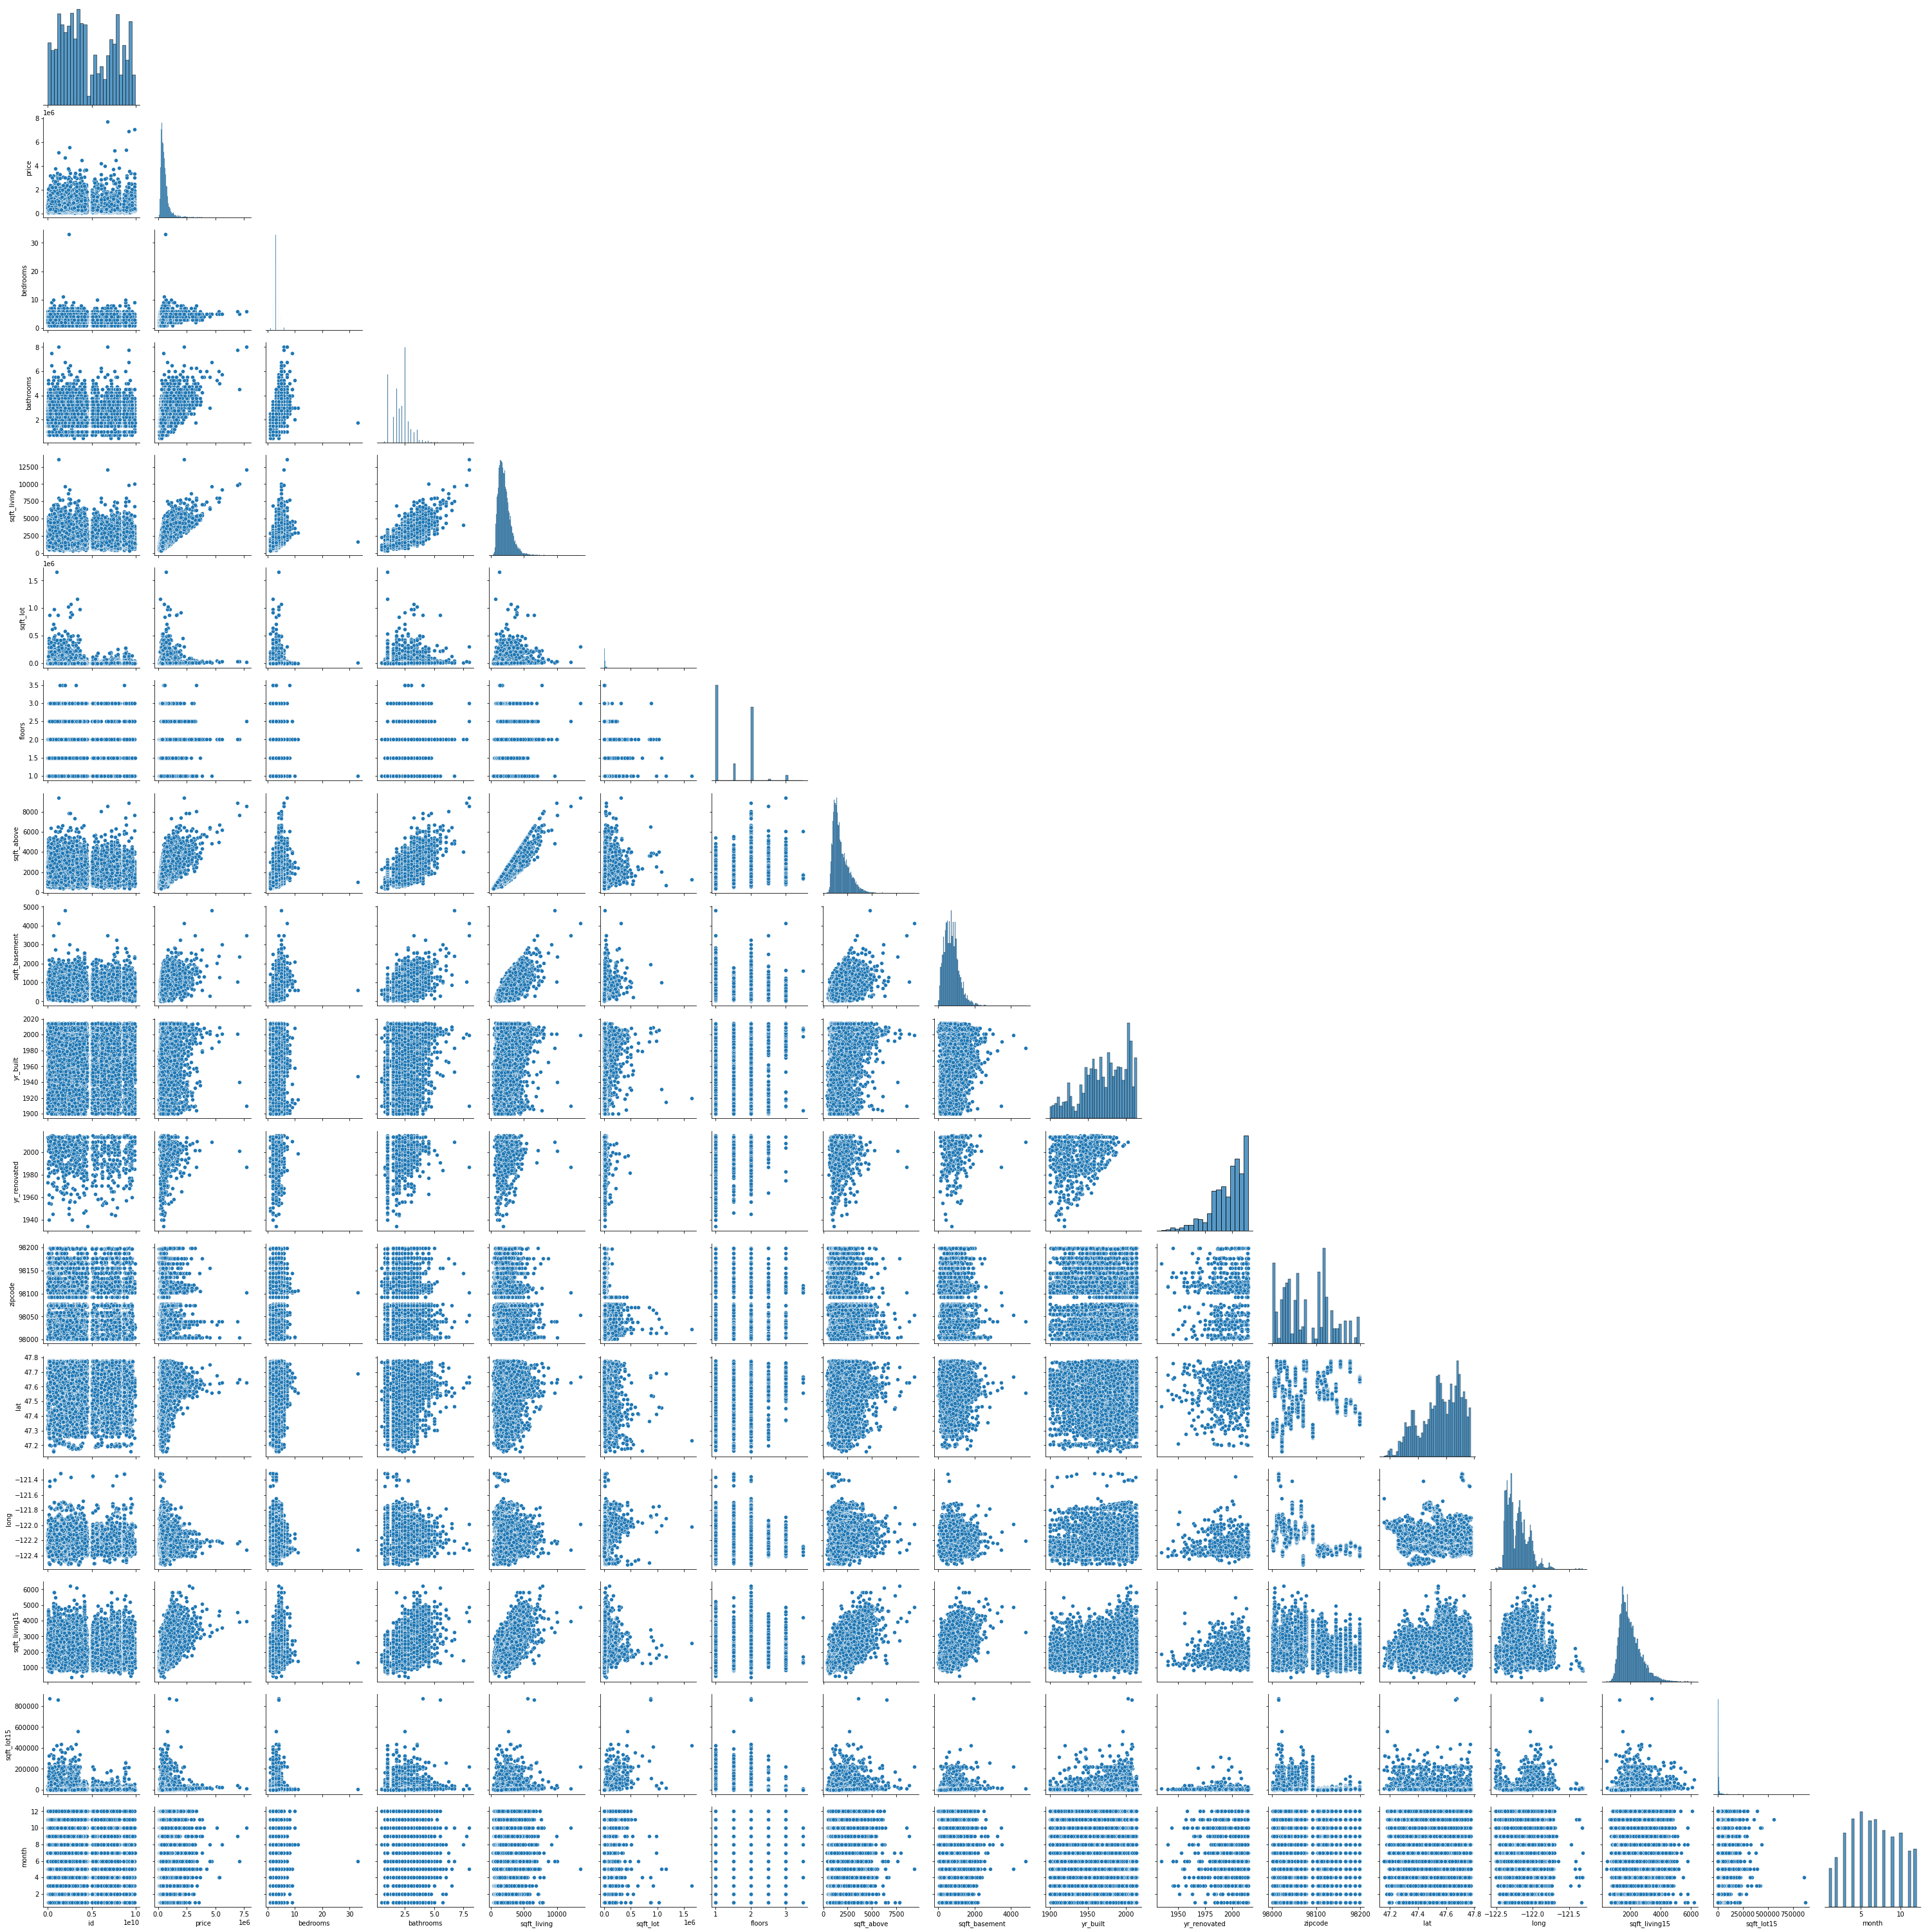

In [26]:
sns.pairplot(data=df, corner=True);

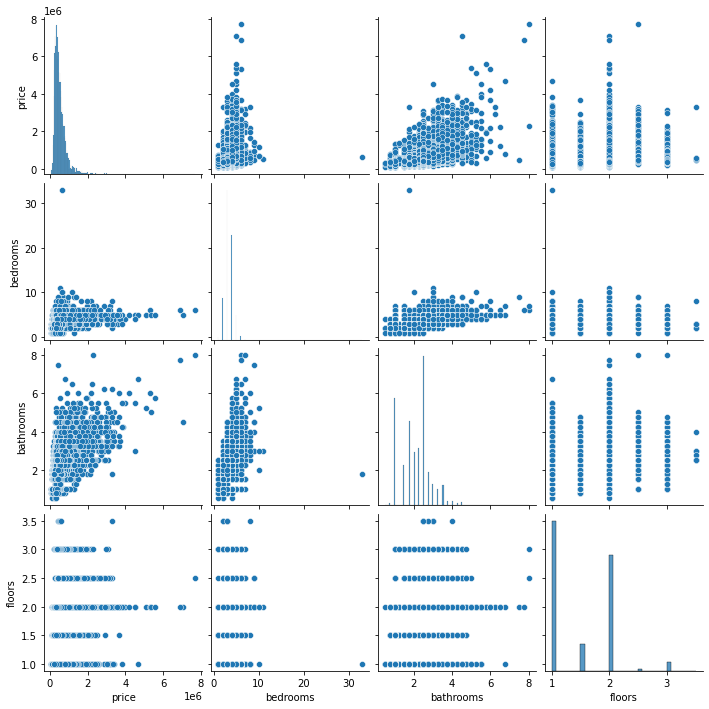

In [27]:
sns.pairplot(data=df, vars=['price', 'bedrooms', 'bathrooms', 'floors']);


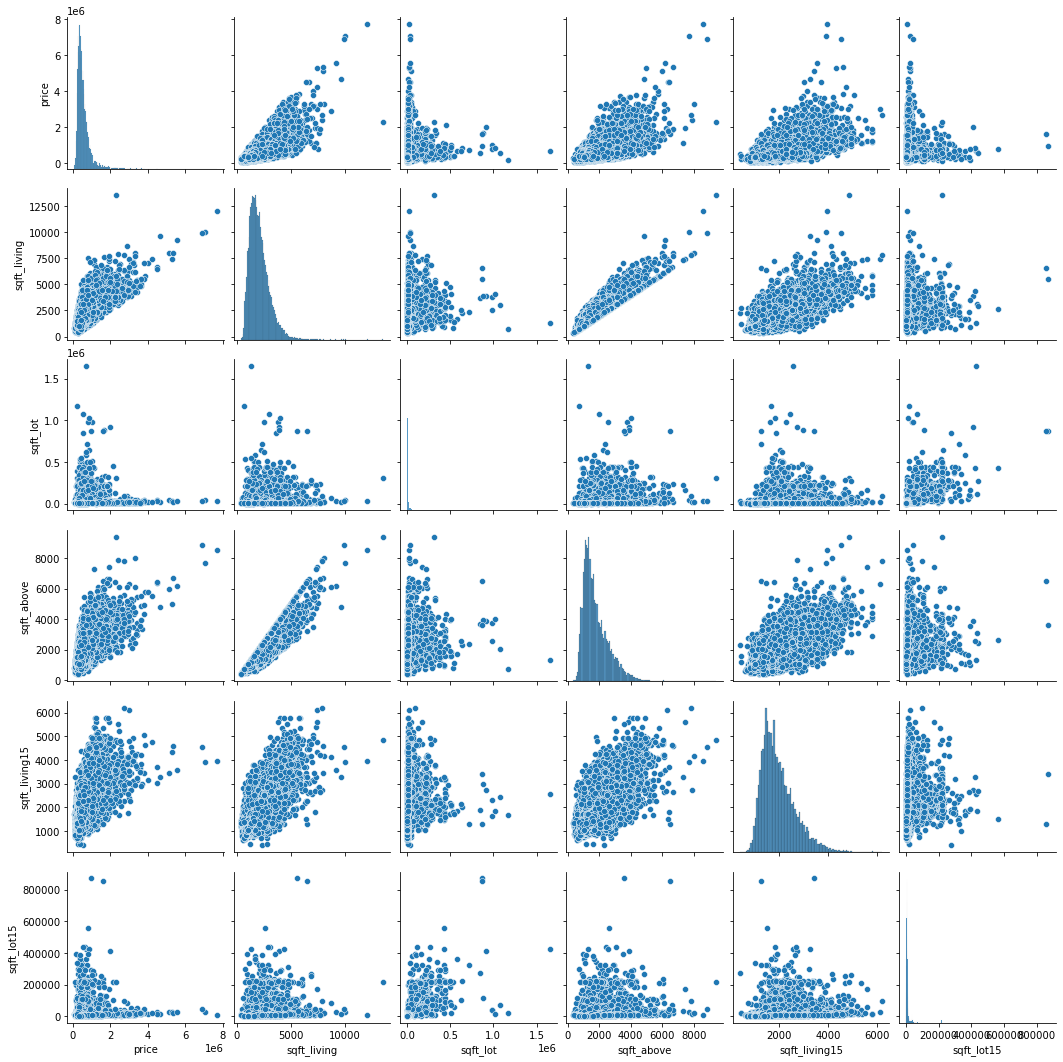

In [28]:
sns.pairplot(data=df, vars=['price','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']);


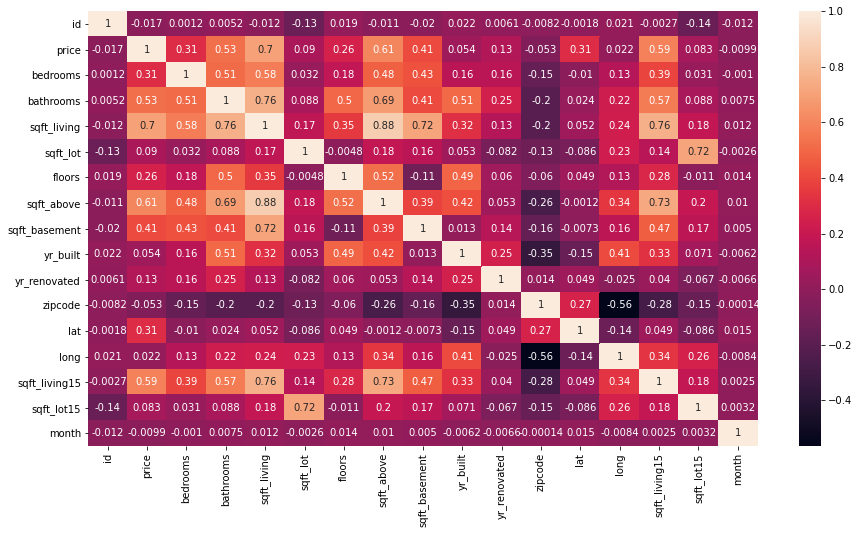

In [29]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True);

In [30]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,-0.020422,0.021617,0.006138,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.011572
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.408355,0.053953,0.125499,-0.053402,0.306692,0.022036,0.585241,0.082845,-0.009928
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.432798,0.155670,0.156142,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.001046
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.411029,0.507173,0.253306,-0.204786,0.024280,0.224903,0.569884,0.088303,0.007543
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.716030,0.318152,0.132791,-0.199802,0.052155,0.241214,0.756402,0.184342,0.012112
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.155108,0.052946,-0.082031,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.002591
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,-0.110683,0.489193,0.059870,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.014245
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.385306,0.424037,0.052690,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.010153
sqft_basement,-0.020422,0.408355,0.432798,0.411029,0.716030,0.155108,-0.110683,0.385306,1.000000,0.013259,0.144045,-0.156517,-0.007294,0.164429,0.473882,0.165330,0.005001
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,0.013259,1.000000,0.249276,-0.347210,-0.148370,0.409993,0.326377,0.070777,-0.006235


## Simple Linear Regression Model

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
X = df['sqft_living']
y = df['price']
simple_model = sm.OLS(y, sm.add_constant(X)).fit()

In [33]:
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:04:01   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X = df['sqft_living15']
y = df['price']
simple_model = sm.OLS(y, sm.add_constant(X)).fit()

In [35]:
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.125e+04
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:04:01   Log-Likelihood:            -3.0286e+05
No. Observations:               21597   AIC:                         6.057e+05
Df Residuals:                   21595   BIC:                         6.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.303e+04   6216.659    -13.356      0.000   -9.52e+04   -7.08e+04
sqft_living15   313.7615      2.958    106.064      0.000     307.963     319.560
==============================================================================
Omnibus:                    20143.282   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1910578.895
Skew:                           4.207   Prob(JB):                         0.00
Kurtosis:                      48.303   Cond. No.                     6.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Takeaway:
- The strongest correlations to price still have a low R-squared value with 'price' as dependent variable in simple linear regression model.
- These models don't do justice given the price variable is not normally distributed. 


## Goals for next session:
- Domain research: figure out what the variables really mean, e.g. sqft_living vs. sqft_living15
- Make adjustments to follow L.I.N.H. assumptions
- Run a multiple regression and find best way to introduce categorical variables to the model.